In [3]:
# numpyの準備
import numpy as np

In [4]:
# csvファイルの表示

#!cat 2D_example_dame.csv

with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



In [5]:
# dataにデータをセット
data = np.loadtxt("2D_example_dame.csv", delimiter=",")

In [6]:
y = data[:,0].astype(int) # 1列目がラベル．整数に変換

In [7]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [8]:
X = data[:,1:3] # 2,3列目がデータ

In [9]:
X

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,              nan],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [             nan,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

In [10]:
X[:, 0] # Xの1列目（csvファイルの2列目）

array([ -7.42847600e+00,   2.98069300e+00,   3.98825500e+00,
        -5.78943700e+00,  -4.89444700e+00,  -1.93394900e+00,
        -1.61177100e+00,  -6.67015200e+00,  -2.93141500e+02,
        -7.47620000e-02,  -2.69179300e+00,   4.61182000e-01,
        -1.35413500e+00,  -6.22947600e+00,   2.77859400e+00,
        -5.71957800e+00,   9.28322000e-01,   8.50475000e-01,
                    nan,   1.11602500e+00])

In [11]:
X[:, 1] # Xの2列目（csvファイルの3列目）

array([  1.50990300e+00,   1.96082100e+00,   4.63638900e+00,
        -4.62161400e+00,  -3.26973000e+02,  -4.72760000e-02,
         5.93220100e+00,  -1.03628200e+00,  -1.04475000e-01,
         1.07000200e+00,   4.16877400e+00,   3.45343800e+00,
         3.75165700e+00,  -1.20943400e+00,              nan,
        -2.43509000e-01,   3.20852000e+00,   2.90895500e+00,
        -1.83119900e+00,   3.35360200e+00])

In [12]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

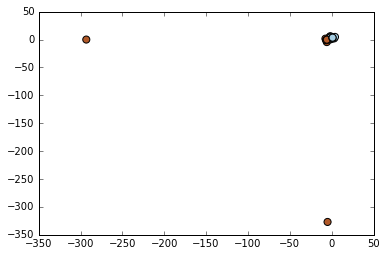

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50); # 2次元散布図でプロット

(-10, 10)

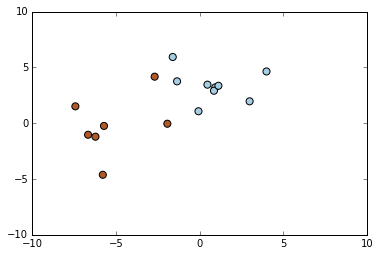

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50); # 2次元散布図でプロット
plt.xlim(-10,10)
plt.ylim(-10,10)

対策の例：NaNと外れ値を除外する

In [15]:
~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True], dtype=bool)

In [16]:
~np.isnan(X[:, 1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True], dtype=bool)

In [17]:
~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True], dtype=bool)

In [18]:
# X1にはNaNがない
X1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])] 
y1 = y[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]

In [19]:
X1, X1.shape

(array([[ -7.42847600e+00,   1.50990300e+00],
        [  2.98069300e+00,   1.96082100e+00],
        [  3.98825500e+00,   4.63638900e+00],
        [ -5.78943700e+00,  -4.62161400e+00],
        [ -4.89444700e+00,  -3.26973000e+02],
        [ -1.93394900e+00,  -4.72760000e-02],
        [ -1.61177100e+00,   5.93220100e+00],
        [ -6.67015200e+00,  -1.03628200e+00],
        [ -2.93141500e+02,  -1.04475000e-01],
        [ -7.47620000e-02,   1.07000200e+00],
        [ -2.69179300e+00,   4.16877400e+00],
        [  4.61182000e-01,   3.45343800e+00],
        [ -1.35413500e+00,   3.75165700e+00],
        [ -6.22947600e+00,  -1.20943400e+00],
        [ -5.71957800e+00,  -2.43509000e-01],
        [  9.28322000e-01,   3.20852000e+00],
        [  8.50475000e-01,   2.90895500e+00],
        [  1.11602500e+00,   3.35360200e+00]]), (18, 2))

In [20]:
(abs(X1[:, 0]) < 10), (abs(X1[:, 1]) < 10) # 外れ値対策

(array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool))

In [21]:
X2 = X1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]
y2 = y1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]

In [22]:
X2, X2.shape

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [ 1.116025,  3.353602]]), (16, 2))

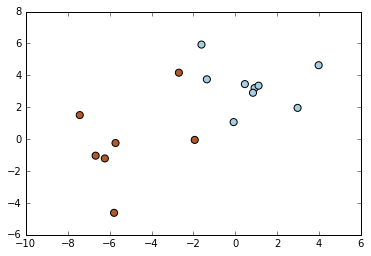

In [23]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50); # 2次元散布図でプロット

対策の例：NaNを埋める

In [24]:
from sklearn.preprocessing import Imputer

In [25]:
missing_value_to_mean = Imputer()

In [26]:
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [27]:
X

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,              nan],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [             nan,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

In [28]:
X_new = missing_value_to_mean.transform(X)
X_new

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,  -1.57953962e+01],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.70755753e+01,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

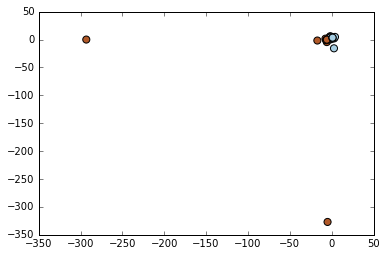

In [29]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50); # 2次元散布図でプロット

In [30]:
missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,   1.50990300e+00],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.61177100e+00,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

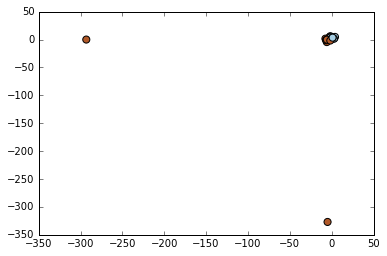

In [31]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y, s=50); # 2次元散布図でプロット